In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import math
from keras.layers import Dense
from keras.layers import GRU,LSTM,RNN, Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## **Import whole data:**

In [2]:
df=pd.read_csv("/content/Brazil (1).csv", engine='python')


## **Choose the country and new cases:**

In [3]:
df=df[df['location']=='Bangladesh']
df=df[['date','new_cases']]

In [4]:
df

,date,new_cases
4343,2020-03-03,NaN
4344,2020-03-04,NaN
4345,2020-03-05,NaN
4346,2020-03-06,NaN
4347,2020-03-07,NaN
...,...,...
4563,2020-10-09,1441.0
4564,2020-10-10,1278.0
4565,2020-10-11,1203.0
4566,2020-10-12,1193.0


## **Plot Figures:**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


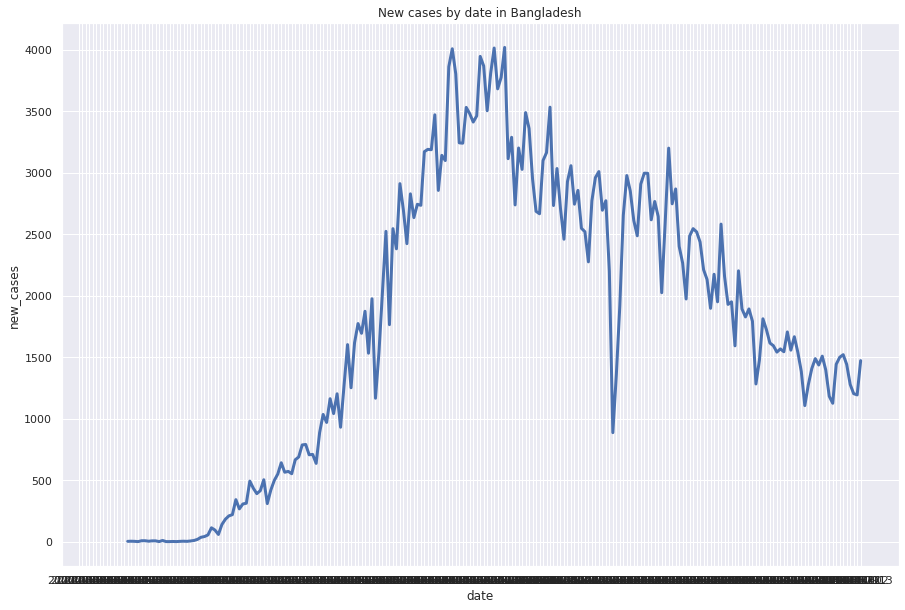

In [5]:
# plt.figure(figsize=(20,15))
# plt.subplot(211)
# plt.plot(df['date'],df['new_cases'])

#plt.figure(figsize=(20,10))
#plt.subplot(212)
#plt.plot(df_['date'],df_['new_deaths'],'r')
#plt.show()

sns.set_theme(style = 'darkgrid')
fig, ax = plt.subplots (figsize=(15,10))
sns.lineplot ('date','new_cases', data=df, linewidth=3)
plt.title ('New cases by date in Bangladesh')
plt.show()


# **Data Preprocessing:**

In [6]:
case_series=df['new_cases'].astype('float32')
case_series=pd.DataFrame(case_series)



In [7]:
case_series=case_series.fillna(0)
case_series

,new_cases
4343,0.0
4344,0.0
4345,0.0
4346,0.0
4347,0.0
...,...
4563,1441.0
4564,1278.0
4565,1203.0
4566,1193.0


In [8]:
import numpy
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset.iloc[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset.iloc[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [9]:
timestep=10
X_case, y_case = create_dataset(case_series, timestep)


In [10]:
train_size=int(len(case_series)*0.85)

In [11]:
x_case_train,x_case_valid=X_case[:train_size,:],X_case[train_size:,:]
y_case_train,y_case_valid=y_case[:train_size],y_case[train_size:]


In [12]:
n_features = 1
x_case_train = x_case_train.reshape((x_case_train.shape[0], x_case_train.shape[1], n_features))

#x_case_test=x_case_test.reshape((x_case_test.shape[0], x_case_test.shape[1], n_features))


## **Model preperation:**

In [13]:

model = Sequential()
model.add((GRU(50,return_sequences=True,activation='relu', input_shape=(timestep, n_features))))
model.add((GRU(20,activation='relu')))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_case_train,y_case_train, epochs=600, verbose=2)

Epoch 1/600
6/6 - 0s - loss: 5154109.5000
Epoch 2/600
6/6 - 0s - loss: 4977198.0000
Epoch 3/600
6/6 - 0s - loss: 4815574.5000
Epoch 4/600
6/6 - 0s - loss: 4601579.5000
Epoch 5/600
6/6 - 0s - loss: 4278541.0000
Epoch 6/600
6/6 - 0s - loss: 3795500.0000
Epoch 7/600
6/6 - 0s - loss: 2713738.0000
Epoch 8/600
6/6 - 0s - loss: 1810610.2500
Epoch 9/600
6/6 - 0s - loss: 707019.3125
Epoch 10/600
6/6 - 0s - loss: 112634.3438
Epoch 11/600
6/6 - 0s - loss: 113969.2422
Epoch 12/600
6/6 - 0s - loss: 96245.0078
Epoch 13/600
6/6 - 0s - loss: 132822.5156
Epoch 14/600
6/6 - 0s - loss: 109418.2109
Epoch 15/600
6/6 - 0s - loss: 92361.2422
Epoch 16/600
6/6 - 0s - loss: 93325.1406
Epoch 17/600
6/6 - 0s - loss: 96364.5312
Epoch 18/600
6/6 - 0s - loss: 92808.9219
Epoch 19/600
6/6 - 0s - loss: 89027.3438
Epoch 20/600
6/6 - 0s - loss: 88249.3594
Epoch 21/600
6/6 - 0s - loss: 87729.1250
Epoch 22/600
6/6 - 0s - loss: 89438.9531
Epoch 23/600
6/6 - 0s - loss: 89330.7031
Epoch 24/600
6/6 - 0s - loss: 86746.6094
Epoc

# **Check validation data:**

In [14]:

case_series_=(df['new_cases'].astype('float32')).fillna(0)
x_input=(case_series_[train_size-15:(train_size+timestep-15)])

x_input=numpy.array(x_input)



In [15]:
x_input

array([2545., 2519., 2436., 2211., 2131., 1897., 2174., 1950., 2582.,
       2158.], dtype=float32)

In [16]:
temp_input=list(x_input)
lst_output=[]
#lst_output.append(x_input)
i=0
while(i<(len(case_series)-train_size)):
    
    if(len(temp_input)>timestep):
        x_input=numpy.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        print(x_input)
        x_input = x_input.reshape((1, timestep, n_features))
        print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        #print("to")
        #x_input=numpy.array(temp_input[1:])
        x_input = x_input.reshape((1, timestep, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[2143.1738]
1 day input [2519.     2436.     2211.     2131.     1897.     2174.     1950.
 2582.     2158.     2143.1738]
[2519.     2436.     2211.     2131.     1897.     2174.     1950.
 2582.     2158.     2143.1738]
[[[2519.    ]
  [2436.    ]
  [2211.    ]
  [2131.    ]
  [1897.    ]
  [2174.    ]
  [1950.    ]
  [2582.    ]
  [2158.    ]
  [2143.1738]]]
1 day output [[2070.473]]
2 day input [2436.     2211.     2131.     1897.     2174.     1950.     2582.
 2158.     2143.1738 2070.473 ]
[2436.     2211.     2131.     1897.     2174.     1950.     2582.
 2158.     2143.1738 2070.473 ]
[[[2436.    ]
  [2211.    ]
  [2131.    ]
  [1897.    ]
  [2174.    ]
  [1950.    ]
  [2582.    ]
  [2158.    ]
  [2143.1738]
  [2070.473 ]]]
2 day output [[2030.6946]]
3 day input [2211.     2131.     1897.     2174.     1950.     2582.     2158.
 2143.1738 2070.473  2030.6946]
[2211.     2131.     1897.     2174.     1950.     2582.     2158.
 2143.1738 2070.473  2030.6946]
[[[2211.    ]
  [2131

In [17]:
day_new=numpy.arange(0,len(case_series))
#day_pred=numpy.arange(250,550)
day_pred=numpy.arange(train_size,train_size+(len(case_series)-train_size))


In [18]:
lst_output=numpy.array(lst_output)
lst_output

array([2143.1738, 2070.473 , 2030.6946, 1987.9581, 1999.411 , 1990.585 ,
       2034.1146, 2021.4722, 1925.9167, 1899.2234, 1873.1342, 1852.9644,
       1837.3655, 1819.7417, 1806.5043, 1788.0231, 1749.6383, 1718.3375,
       1700.1996, 1681.7699, 1663.1455, 1643.3566, 1623.8892, 1604.09  ,
       1580.9501, 1558.2749, 1539.7539, 1522.3485, 1504.3408, 1485.9259,
       1467.5911, 1449.5518, 1431.2417, 1413.0741], dtype=float32)

No handles with labels found to put in legend.


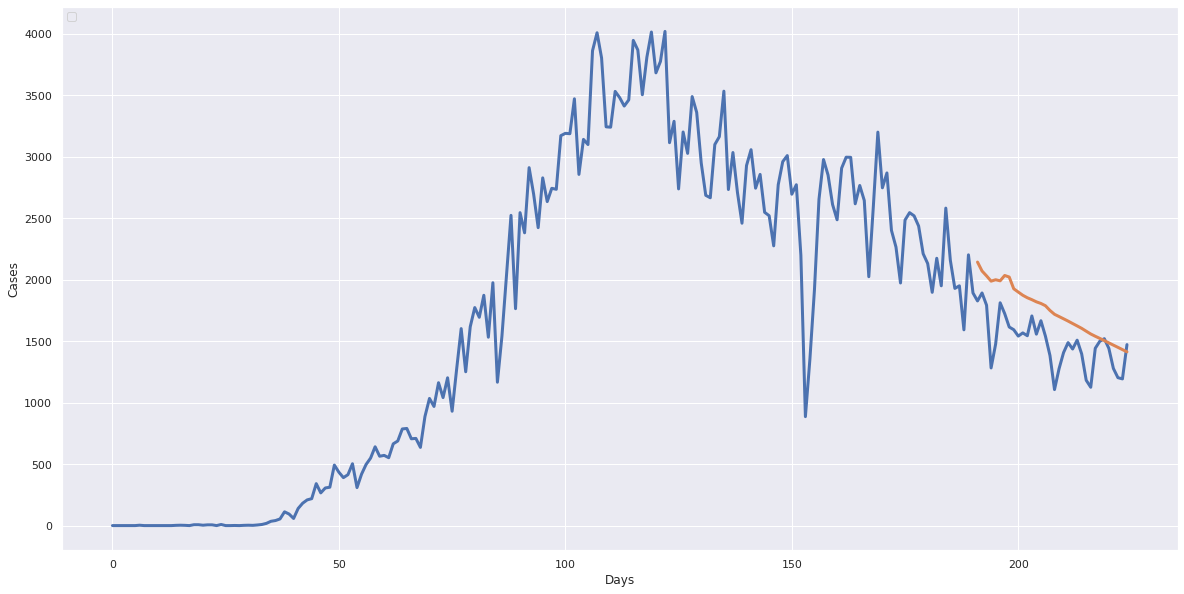

In [19]:
# plt.figure(figsize=(20,10))
# plt.plot(day_new,case_series)
# plt.plot(day_pred,lst_output)
#plt.plot(case_series_)

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(day_new,case_series, linewidth = 3)
plt.plot(day_pred,lst_output, linewidth = 3)
plt.xlabel('Days')
plt.ylabel ('Cases')
plt.legend(loc = 'upper left')
plt.show()

# Forecasting:

---



---



In [20]:
case_series_=(df['new_cases'].astype('float32')).fillna(0)
x_input=(case_series_[-timestep:])
x_input=numpy.array(x_input)



In [21]:

x_input

array([1182., 1125., 1442., 1499., 1520., 1441., 1278., 1203., 1193.,
       1472.], dtype=float32)

In [22]:
temp_input=list(x_input)
lst_output=[]
#lst_output.append(x_input)
i=0
while(i<40):
    
    if(len(temp_input)>timestep):
        x_input=numpy.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        print(x_input)
        x_input = x_input.reshape((1, timestep, n_features))
        print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        #print("to")
        #x_input=numpy.array(temp_input[1:])
        x_input = x_input.reshape((1, timestep, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[1424.389]
1 day input [1125.    1442.    1499.    1520.    1441.    1278.    1203.    1193.
 1472.    1424.389]
[1125.    1442.    1499.    1520.    1441.    1278.    1203.    1193.
 1472.    1424.389]
[[[1125.   ]
  [1442.   ]
  [1499.   ]
  [1520.   ]
  [1441.   ]
  [1278.   ]
  [1203.   ]
  [1193.   ]
  [1472.   ]
  [1424.389]]]
1 day output [[1429.9691]]
2 day input [1442.     1499.     1520.     1441.     1278.     1203.     1193.
 1472.     1424.389  1429.9691]
[1442.     1499.     1520.     1441.     1278.     1203.     1193.
 1472.     1424.389  1429.9691]
[[[1442.    ]
  [1499.    ]
  [1520.    ]
  [1441.    ]
  [1278.    ]
  [1203.    ]
  [1193.    ]
  [1472.    ]
  [1424.389 ]
  [1429.9691]]]
2 day output [[1384.1807]]
3 day input [1499.     1520.     1441.     1278.     1203.     1193.     1472.
 1424.389  1429.9691 1384.1807]
[1499.     1520.     1441.     1278.     1203.     1193.     1472.
 1424.389  1429.9691 1384.1807]
[[[1499.    ]
  [1520.    ]
  [1441.    ]
  [1278

In [23]:
day_new=numpy.arange(0,len(case_series))
#day_pred=numpy.arange(250,550)
day_pred=numpy.arange(len(case_series)-1,len(case_series)+39)


No handles with labels found to put in legend.


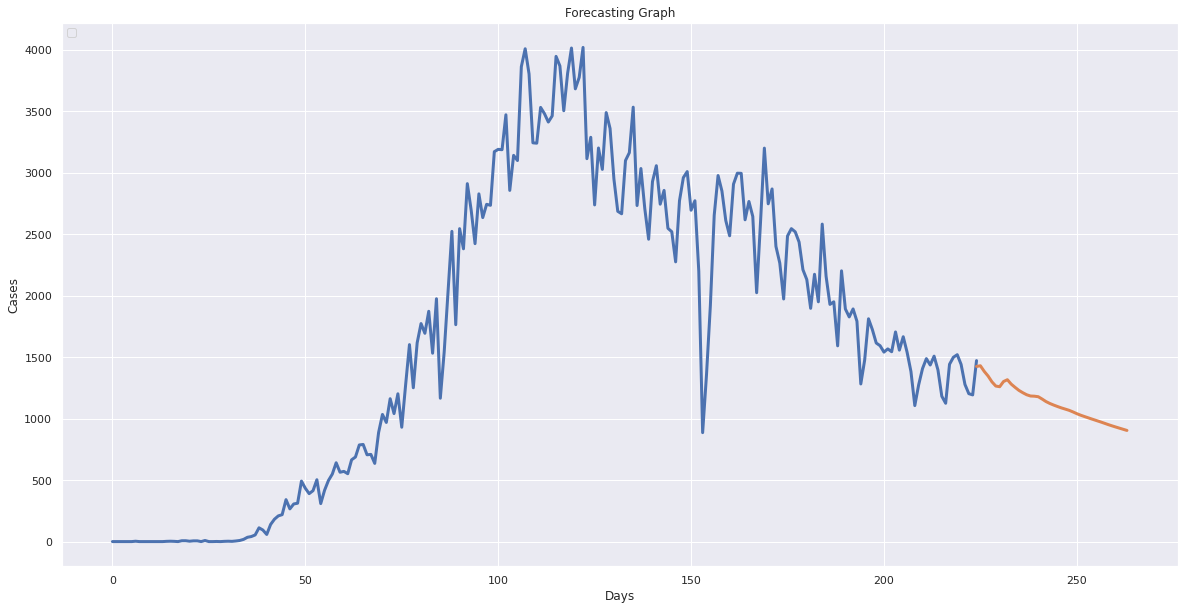

In [24]:
# plt.figure(figsize=(20,10))
# plt.plot(day_new,case_series)
# plt.plot(day_pred,lst_output)
#plt.plot(case_series_)

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(day_new,case_series, linewidth = 3)
plt.plot(day_pred,lst_output, linewidth = 3)
plt.xlabel('Days')
plt.ylabel ('Cases')
plt.legend(loc = 'upper left')
plt.title('Forecasting Graph')
plt.show()